In [46]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from operator import itemgetter

In [2]:
# Use if you need to unzip the file
from zipfile import ZipFile
file_name = "drugsCom_raw.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done!')

Done!


In [47]:
# Bring in data
train = pd.read_csv("drugsComTrain_raw.tsv", sep='\t')
test = pd.read_csv("drugsComTest_raw.tsv", sep='\t')

In [5]:
# Look at the data
train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (161297, 7)
Test shape: (53766, 7)


**Data Cleaning**

In [6]:
# Remove unneeded columns
train.drop(['Unnamed: 0', 'date', 'usefulCount'], axis=1, inplace=True)
test.drop(['Unnamed: 0', 'date', 'usefulCount'], axis=1, inplace=True)
train.head()

,drugName,condition,review,rating
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0


In [7]:
train.dtypes

drugName      object
condition     object
review        object
rating       float64
dtype: object

In [8]:
train['drugName'].value_counts()

Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Zileuton                                1
Fortamet                                1
Nitrolingual Pumpspray                  1
Generlac                                1
Vesanoid                                1
Name: drugName, Length: 3436, dtype: int64

In [9]:
train['condition'].value_counts()

Birth Control                                            28788
Depression                                                9069
Pain                                                      6145
Anxiety                                                   5904
Acne                                                      5588
                                                         ...  
Prevention of Perinatal Group B Streptococcal Disease        1
Short Stature                                                1
Strongyloidiasis                                             1
63</span> users found this comment helpful.                  1
llicular Lymphoma                                            1
Name: condition, Length: 884, dtype: int64

In [10]:
# Take a closer look at all the conditions 
conditions_list = train['condition'].tolist()
conditions_list

['Left Ventricular Dysfunction',
 'ADHD',
 'Birth Control',
 'Birth Control',
 'Opiate Dependence',
 'Benign Prostatic Hyperplasia',
 'Emergency Contraception',
 'Bipolar Disorde',
 'Epilepsy',
 'Birth Control',
 'Migraine Prevention',
 'Depression',
 "Crohn's Disease",
 'Cough',
 'Birth Control',
 'Obesity',
 'Urinary Tract Infection',
 'ibromyalgia',
 'Bipolar Disorde',
 'Chronic Myelogenous Leukemia',
 'HIV Infection',
 'Insomnia',
 'Birth Control',
 'Rheumatoid Arthritis',
 'Vaginal Yeast Infection',
 'Chlamydia Infection',
 'Hirsutism',
 'ADHD',
 'Panic Disorde',
 'Migraine',
 nan,
 'Depression',
 'Pain',
 'Vaginal Yeast Infection',
 'Irritable Bowel Syndrome',
 'Osteoarthritis',
 'Constipation',
 'Pain',
 'Bowel Preparation',
 'Psychosis',
 'Vaginal Yeast Infection',
 'Obesity',
 'Panic Disorde',
 'Muscle Spasm',
 'Depression',
 'Hepatitis C',
 'Hepatitis C',
 'Bipolar Disorde',
 'Overactive Bladde',
 'Urinary Tract Infection',
 'Diabetes, Type 2',
 'ADHD',
 'Pain',
 'Asthma, Mai

In [7]:
# Remove records with nan entries
train.dropna(inplace=True)
test.dropna(inplace=True)

In [8]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (160398, 4)
Test shape: (53471, 4)


In [9]:
# Remove records that have conditions that are incorrectly parsed 
train = train[~train.condition.str.contains('users found')]
test = test[~test.condition.str.contains('users found')]

In [10]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (159498, 4)
Test shape: (53200, 4)


In [11]:
# Reset index the dfs
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

**Exploratory Data Analysis**

([<matplotlib.axis.XTick at 0x1559ad6afd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

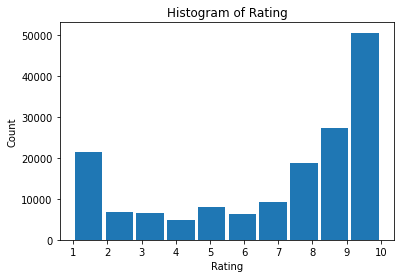

In [46]:
# Histogram of rating
plt.hist(train.rating, bins=10, rwidth=0.9)
plt.title("Histogram of Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks([1,2,3,4,5,6,7,8,9,10])

Text(0.5, 0, 'Review Count')

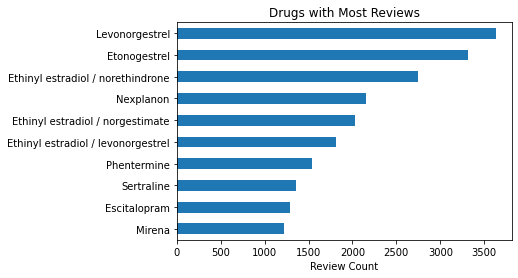

In [52]:
# Most reviewed drugs
ax = train['drugName'].value_counts()[:10].plot(kind='barh')
ax.invert_yaxis()
plt.title("Drugs with Most Reviews")
plt.xlabel("Review Count")

Text(0.5, 0, 'Review Count')

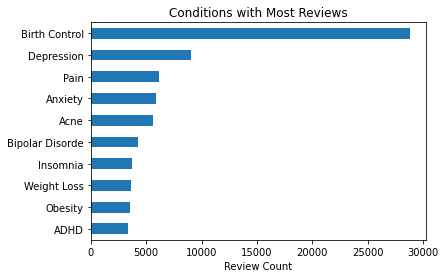

In [53]:
# Most reviewed conditions
ax = train['condition'].value_counts()[:10].plot(kind='barh')
ax.invert_yaxis()
plt.title("Conditions with Most Reviews")
plt.xlabel("Review Count")

In [74]:
# Find the top 10 drugs with the highest mean rating and over 50 reviews

# Group the data and filter out any drugs that don't have more than 50 reviews
top_drugs = train.groupby("drugName").filter(lambda x: len(x) > 50)

# Calculate the mean rating for each drug
top_drugs = top_drugs.groupby('drugName', as_index=False)['rating'].mean()

# Sort the drugs by mean rating
top_drugs = top_drugs.sort_values(by=['rating'], ascending=False)

# Reset the index
top_drugs.reset_index(inplace=True, drop=True)

top_drugs.head(10)

,drugName,rating
0,Stribild,9.466667
1,Cobicistat / elvitegravir / emtricitabine / te...,9.433962
2,Diethylpropion,9.305882
3,Chlorpheniramine / hydrocodone,9.275000
4,Campral,9.252747
5,Librium,9.230769
6,Carisoprodol,9.202899
7,Chlordiazepoxide,9.191011
8,Subutex,9.169492
9,Clobetasol,9.166667


In [75]:
# Find the top 10 conditions with the highest mean rating

# Group the data and filter out any conditions that don't have more than 50 reviews
top_conditions = train.groupby("condition").filter(lambda x: len(x) > 50)

# Calculate the mean rating for each condition
top_conditions = top_conditions.groupby('condition', as_index=False)['rating'].mean()

# Sort the conditions by mean rating
top_conditions = top_conditions.sort_values(by=['rating'], ascending=False)

# Reset the index
top_conditions.reset_index(inplace=True, drop=True)

top_conditions.head(10)

,condition,rating
0,mance Anxiety,9.673797
1,Alcohol Withdrawal,9.244240
2,Dermatitis,9.096774
3,Cold Sores,9.068120
4,Hyperhidrosis,8.935007
5,Alcohol Dependence,8.894330
6,Barrett's Esophagus,8.864865
7,Erosive Esophagitis,8.842857
8,"Herpes Simplex, Suppression",8.789157
9,Cluster Headaches,8.771084


**Method 1: Sentiment analysis with TextBlob**
Use TextBlob semantic polarity score for my analysis of review sentiment.
TextBlob provides a score between -1 and 1 for the sentiment. 
-1 = rating of 1
0 = rating of 5
1 = rating of 10

In [ ]:
# Create a new column that contains the sentiment of the rating
# Sentiment will be based on the rating as such: 1-4 = Negative, 5-6 = Neutral, and 7-10 = Positive
conditions = [
    (train['rating'] <= 4),
    (train['rating'] == 5) | (train['rating'] == 6),
    (train['rating'] >= 7)
]

# assign labels
values = ['neg', 'neutral', 'pos']

train['sentByRating'] = np.select(conditions, values)
train.head()

In [15]:
# Import library
from textblob import TextBlob

In [16]:
# Iterate over the reviews and assign a sentiment score
train['polarityScore'] = train['review'].apply(lambda review: TextBlob(review).sentiment.polarity)

In [17]:
train.head()

,drugName,condition,review,rating,sentByRating,polarityScore
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,pos,0.000000
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,pos,0.168333
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,neutral,0.067210
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,pos,0.179545
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,pos,0.194444


In [18]:
# Define how to interpret the polarity score
conditions = [
    (train['polarityScore'] > 0.0),
    (train['polarityScore'] == 0.0),
    (train['polarityScore'] < 0.0)
]

# assign labels
values = ['pos', 'neutral', 'neg']

train['sentByText'] = np.select(conditions, values)

In [20]:
train.head()

,drugName,condition,review,rating,sentByRating,polarityScore,sentByText
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,pos,0.000000,neutral
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,pos,0.168333,pos
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,neutral,0.067210,pos
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,pos,0.179545,pos
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,pos,0.194444,pos


In [22]:
# Compare the two columns
got_right = train[train['sentByRating'] == train['sentByText']]
got_wrong = train[train['sentByRating'] != train['sentByText']]

In [23]:
print(got_right.shape)
print(got_wrong.shape)

(98819, 7)
(60679, 7)


In [24]:
total_records = len(got_right) + len(got_wrong)
print("Accuracy Score: {}".format(len(got_right) / total_records))

Accuracy Score: 0.6195626277445485


**Method 2: Sentiment analysis with neural network (RNN)**

In [12]:
# Import additional libraries
from keras.preprocessing.text import Tokenizer
from keras. preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from keras.layers import LSTM

In [13]:
train.head()

,drugName,condition,review,rating
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0


In [14]:
# For a neural network, everything needs to be transformed into numeric values.
# Target label will be based on the rating as such: 1-4 = 2 (Negative), 5-6 = 1 (Neutral), and 7-10 = 0 (Positive)
conditions = [(train['rating'] <= 4), 
              (train['rating'] == 5) | (train['rating'] == 6), 
              (train['rating'] >= 7)]

# assign labels
values = [2, 1, 0]

train['target'] = np.select(conditions, values)

In [15]:
# Do the same for the test data
conditions = [(test['rating'] <= 4), 
              (test['rating'] == 5) | (test['rating'] == 6), 
              (test['rating'] >= 7)]

# assign labels
values = [2, 1, 0]

test['target'] = np.select(conditions, values)

In [16]:
# Now drop additional columns
train.drop(['drugName', 'condition', 'rating'], axis=1, inplace=True)
test.drop(['drugName', 'condition', 'rating'], axis=1, inplace=True)

In [17]:
# Verify everything is correct before continuing preprocessing of data
train.head()

,review,target
0,"""It has no side effect, I take it in combinati...",0
1,"""My son is halfway through his fourth week of ...",0
2,"""I used to take another oral contraceptive, wh...",1
3,"""This is my first time using any form of birth...",0
4,"""Suboxone has completely turned my life around...",0


In [18]:
# Verify everything is correct before continuing preprocessing of data
test.head()

,review,target
0,"""I&#039;ve tried a few antidepressants over th...",0
1,"""My son has Crohn&#039;s disease and has done ...",0
2,"""Quick reduction of symptoms""",0
3,"""Contrave combines drugs that were used for al...",0
4,"""I have been on this birth control for one cyc...",0


In [20]:
# Set aside validation data. There doesn't appear to be any order to the data, so just take first 10000 records.
val = train[:10000]
partial_train = train[10000:]

In [21]:
# Seperate out features and target for each of the sets
x_train = train.drop(['target'], axis = 1)
y_train = train['target']

partial_x_train = partial_train.drop(['target'], axis = 1)
partial_y_train = partial_train['target']

x_val = val.drop(['target'], axis = 1)
y_val = val['target']

x_test = test.drop(['target'],axis=1)
y_test= test['target']

In [22]:
# create lists of text to prepare for tokenization
train_texts = x_train["review"].tolist()
partial_train_texts = partial_x_train["review"].tolist()
val_texts = x_val["review"].tolist()
test_texts = x_test["review"].tolist()

In [23]:
# Tokenize the raw data
maxlen = 100
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)
sequences = tokenizer.texts_to_sequences(train_texts)
word_index = tokenizer.word_index
print('Found %s uniques tokens.' % len(word_index))

x_train = pad_sequences(sequences, maxlen=maxlen)
y_train = np.array(y_train)

print('Shape of x_train tensor:', x_train.shape)
print('Shape of y_train tensor:', y_train.shape)

sequences2 = tokenizer.texts_to_sequences(partial_train_texts)
partial_x_train = pad_sequences(sequences2, maxlen=maxlen)
partial_y_train = np.array(partial_y_train)

print('Shape of partial_x_train tensor:', partial_x_train.shape)
print('Shape of partial_y_train tensor:', partial_y_train.shape)

sequences3 = tokenizer.texts_to_sequences(val_texts)
x_val = pad_sequences(sequences3, maxlen=maxlen)
y_val = np.array(y_val)

print('Shape of x_val tensor:', x_val.shape)
print('Shape of y_val tensor:', y_val.shape)

sequences4 = tokenizer.texts_to_sequences(test_texts)
x_test = pad_sequences(sequences4, maxlen=maxlen)
y_test = np.array(y_test)

print('Shape of x_test tensor:', x_test.shape)
print('Shape of y_test tensor:', y_test.shape)

Found 51253 uniques tokens.
Shape of x_train tensor: (159498, 100)
Shape of y_train tensor: (159498,)
Shape of partial_x_train tensor: (149498, 100)
Shape of partial_y_train tensor: (149498,)
Shape of x_val tensor: (10000, 100)
Shape of y_val tensor: (10000,)
Shape of x_test tensor: (53200, 100)
Shape of y_test tensor: (53200,)


In [24]:
# Define variables
max_features = 10000

# Build model with LSTM layer
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(3, activation='softmax'))

In [25]:
# View the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 328,419
Trainable params: 328,419
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [42]:
# We know from EDA that the classes are imbalanced, let's see how bad
pos, neutral, neg = np.bincount(partial_y_train)
total = neg + neutral + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)'.format(
    total, pos, 100 * pos / total))
print('Neutral: {} ({:.2f}% of total)'.format(neutral, 100 * neutral / total))
print('Negative: {} ({:.2f}% of total)'.format(neg, 100 * neg / total))

Examples:
    Total: 149498
    Positive: 99163 (66.33% of total)
Neutral: 13237 (8.85% of total)
Negative: 37098 (24.82% of total)


In [43]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / pos) * (total / 2.0)
weight_for_1 = (1 / neutral) * (total / 2.0)
weight_for_2 = (1 / neg) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))

Weight for class 0: 0.75
Weight for class 1: 5.65
Weight for class 2: 2.01


In [44]:
# Fit the model on the training data
history = model.fit(partial_x_train, partial_y_train, epochs=10, 
                    batch_size=128, validation_data=(x_val, y_val), class_weight=class_weight)

Epoch 1/10
1168/1168 [==============================] - 97s 82ms/step - loss: 1.3820 - acc: 0.6217 - val_loss: 0.6787 - val_acc: 0.7090
Epoch 2/10
1168/1168 [==============================] - 94s 81ms/step - loss: 1.0814 - acc: 0.7083 - val_loss: 0.6223 - val_acc: 0.7427
Epoch 3/10
1168/1168 [==============================] - 94s 81ms/step - loss: 0.9810 - acc: 0.7357 - val_loss: 0.6945 - val_acc: 0.6898
Epoch 4/10
1168/1168 [==============================] - 94s 80ms/step - loss: 0.8800 - acc: 0.7625 - val_loss: 0.5968 - val_acc: 0.7580
Epoch 5/10
1168/1168 [==============================] - 94s 81ms/step - loss: 0.7965 - acc: 0.7882 - val_loss: 0.6742 - val_acc: 0.7205
Epoch 6/10
1168/1168 [==============================] - 93s 80ms/step - loss: 0.7102 - acc: 0.8086 - val_loss: 0.6353 - val_acc: 0.7472
Epoch 7/10
1168/1168 [==============================] - 95s 81ms/step - loss: 0.6349 - acc: 0.8313 - val_loss: 0.6003 - val_acc: 0.7785
Epoch 8/10
1168/1168 [==========================

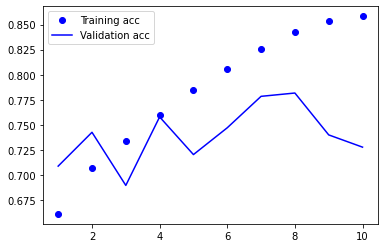

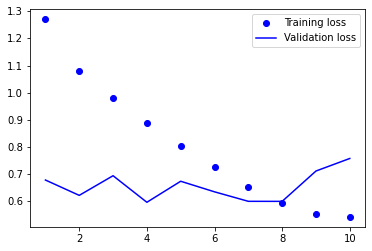

In [48]:
# Plot training/validation accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.legend()

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()

In [49]:
# Retrain the model from scratch using the optimum number of epochs and full training set
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=8, batch_size=128, class_weight=class_weight)

Epoch 1/8
1247/1247 [==============================] - 100s 79ms/step - loss: 0.5182 - acc: 0.8683
Epoch 2/8
1247/1247 [==============================] - 97s 78ms/step - loss: 0.4423 - acc: 0.8868
Epoch 3/8
1247/1247 [==============================] - 97s 78ms/step - loss: 0.4127 - acc: 0.8923
Epoch 4/8
1247/1247 [==============================] - 97s 78ms/step - loss: 0.3795 - acc: 0.9012
Epoch 5/8
1247/1247 [==============================] - 96s 77ms/step - loss: 0.3369 - acc: 0.9094
Epoch 6/8
1247/1247 [==============================] - 96s 77ms/step - loss: 0.3192 - acc: 0.9155
Epoch 7/8
1247/1247 [==============================] - 96s 77ms/step - loss: 0.3094 - acc: 0.9161
Epoch 8/8
1247/1247 [==============================] - 96s 77ms/step - loss: 0.2878 - acc: 0.9216


In [50]:
# Evaluate the model on the test set
model.evaluate(x_test, y_test)

1663/1663 [==============================] - 27s 16ms/step - loss: 0.6009 - acc: 0.8333


[0.600941002368927, 0.833345890045166]

**Results Visualizations**

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

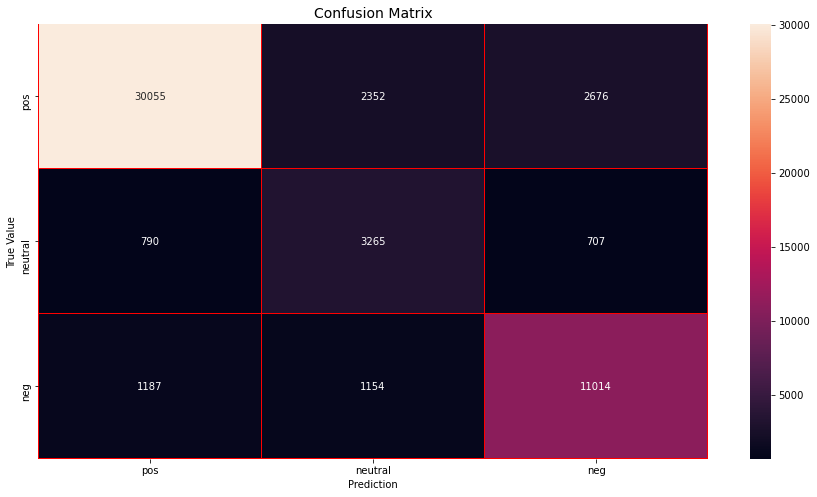

In [52]:
# Create a confusion matrix displaying true values against predicted values
labels = ['pos', 'neutral', 'neg']

y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)

f, ax=plt.subplots(figsize=(15,8))
sns.heatmap(cm,
            annot=True,
            linewidths=0.005,
            linecolor="red",
            fmt=".0f",
            ax=ax,
            xticklabels=labels,
            yticklabels=labels
           )

plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.title("Confusion Matrix", fontsize=14)
plt.show()

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     35083
           1       0.48      0.69      0.57      4762
           2       0.77      0.82      0.79     13355

    accuracy                           0.83     53200
   macro avg       0.73      0.79      0.75     53200
weighted avg       0.85      0.83      0.84     53200



In [54]:
# Prepare the data to display in classifcation report heatmap
clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=labels,
                                   output_dict=True)

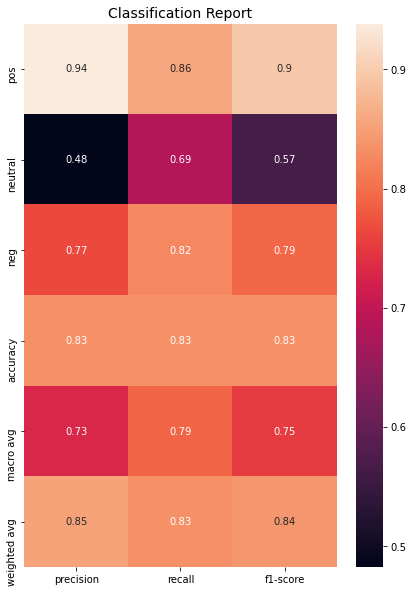

In [55]:
# Plot the classification report heatmap
f, ax=plt.subplots(figsize=(7,10))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title("Classification Report", fontsize=14)
plt.show()